# K-means clustering with Heratrate, Steps, and SleepMin factors

### Steps to set up graphviz for decision tree classification
1. Download and Install graphviz for windows at https://graphviz.gitlab.io/_pages/Download/Download_windows.html
2. Install the libraries
    - conda install -c anaconda graphviz
    - conda install -c anaconda pydotplus
3. Add to path in system Variables
    - type "Edit the system environment variables"
    - In Advanced tab go to Environment Variables
    - In System variables edit the Path and add _C:\Program Files (x86)\Graphviz2.38\bin_ or location of the bin where you previously installed grahviz

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics
#For Descision Tree Visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz 
import pydotplus



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df_j3 = pd.read_csv("finalData.csv",index_col=0)
df_j3["Activities"]=df_j3["VeryActiveMinutes"] +df_j3["FairlyActiveMinutes"]+df_j3["LightlyActiveMinutes"]
df_j3.drop(['VeryActiveMinutes', 'FairlyActiveMinutes','LightlyActiveMinutes','Calories',
            'Activities' , 'SedentaryMinutes' ], axis=1, inplace = True)
df_j3

,Heartrate,TotalSteps,sleepMin
0,64.863768,8328,528
1,61.058824,8328,528
2,59.720930,8328,528
3,58.935103,8328,528
4,58.590116,8328,528
...,...,...,...
1251,81.772257,20,492
1252,67.000000,20,492
1253,62.180556,20,492
1254,66.549072,20,492


In [3]:
# transforme data into standard scaler
from sklearn.preprocessing import StandardScaler
X = df_j3.values
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.66172326, -0.23068574,  0.7685682 ],
       [-0.94626452, -0.23068574,  0.7685682 ],
       [-1.04631482, -0.23068574,  0.7685682 ],
       ...,
       [-0.86237919, -2.11812539,  0.47050676],
       [-0.53569295, -2.11812539,  0.47050676],
       [-0.26184259, -2.11812539,  0.47050676]])

In [4]:
#elbow method
Sum_of_squared_distances = []
K = range(1,12)
for k in K:
    km = KMeans(init = "k-means++", n_clusters = k)
    km = km.fit(Clus_dataSet)
    Sum_of_squared_distances.append(km.inertia_)

In [5]:
#plt.plot(K, Sum_of_squared_distances, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Sum_of_squared_distances')
#plt.title('Elbow Method For Optimal k')
#plt.show()

elbow method showed that the optimal k would be 4

In [6]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[0 0 0 ... 2 2 2]


In [7]:
df_j3["Label"] = labels
df_j3["Label"] = pd.Categorical(df_j3["Label"], df_j3["Label"].unique())
df_j3["Label"] = df_j3["Label"].cat.rename_categories(['Low', 'LowA', 'Meduim', 'High']) #LowA means that it's low but might be active
df_j3.head(5)

,Heartrate,TotalSteps,sleepMin,Label
0,64.863768,8328,528,Low
1,61.058824,8328,528,Low
2,59.720930,8328,528,Low
3,58.935103,8328,528,Low
4,58.590116,8328,528,Low


In [8]:
# used to store the cluster data
df_j3.to_csv('clustered_data.csv')

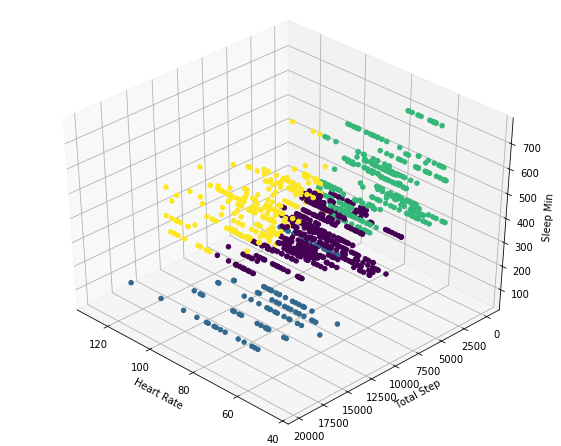

In [9]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=38, azim=135)

plt.cla()

ax.set_xlabel('Heart Rate')
ax.set_ylabel('Total Step')
ax.set_zlabel('Sleep Min')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.float),alpha=1)

In [10]:
first_cluster = df_j3.loc[df_j3['Label']=="Low"]

second_cluster = df_j3.loc[df_j3['Label']=="LowA"]

third_cluster = df_j3.loc[df_j3['Label']=="Meduim"]

fourth_cluster = df_j3.loc[df_j3['Label']=="High"]


In [11]:
first_cluster.describe()

,Heartrate,TotalSteps,sleepMin
count,580.000000,580.000000,580.000000
mean,66.622957,11430.325862,445.522414
std,7.225743,2375.572552,61.462975
min,43.750799,7401.000000,256.000000
25%,62.153327,10001.000000,405.000000
50%,67.129048,11080.000000,445.000000
75%,72.228522,12409.000000,480.000000
max,79.408824,19658.000000,562.000000


#### From the first cluster we can see that the heartrate is normal, the steps are very good, and the sleeping minures are normal. Therefore, we can say that the chance that the user might have anxiety is [Low].

In [12]:
second_cluster.describe()

,Heartrate,TotalSteps,sleepMin
count,227.000000,227.000000,227.000000
mean,91.189293,11760.792952,466.537445
std,9.804509,3283.077923,57.289531
min,78.032828,2862.000000,352.000000
25%,83.798526,10114.000000,422.000000
50%,89.104294,11761.000000,458.000000
75%,95.874621,12480.000000,515.000000
max,127.679529,19658.000000,617.000000


#### From the second cluster we can see that 75% of the heartrate is high, the steps are very good, and the sleeping minutes are normal. Therefore, we can say that the chance that the user might have anxiety is [Low]. Note: The user might be active, which explains the high heartrate.

In [13]:
third_cluster.describe()

,Heartrate,TotalSteps,sleepMin
count,350.000000,350.000000,350.000000
mean,70.641205,3653.937143,491.491429
std,10.952635,2404.535998,85.644723
min,46.793750,8.000000,363.000000
25%,62.943008,1988.000000,450.000000
50%,70.135989,3436.000000,468.000000
75%,77.862166,5893.000000,516.000000
max,101.370667,8328.000000,750.000000


#### From the third cluster we can see that the heartrate is normal, the steps are very weak, and the sleeping minutes are normal. Therefore, we can say that the chance that the user might have anxiety is [Medium].

In [14]:
fourth_cluster.describe()

,Heartrate,TotalSteps,sleepMin
count,99.000000,99.000000,99.000000
mean,86.031864,11688.525253,103.505051
std,11.934618,3009.225035,74.748609
min,62.240356,7476.000000,63.000000
25%,77.779223,9910.000000,65.000000
50%,84.526462,10976.000000,69.000000
75%,93.424594,14100.000000,72.000000
max,128.607407,16806.000000,256.000000


#### From the fourth cluster we can see that 75% of the heartrate is high, the sleeping minutes are very low, but the steps are very good. Therefore, we can say that the chance that the user might have anxiety is [High].

# Step By Step Guide to Descision Tree Classifier

Assigned X to feature varaiables

In [39]:
df_desc=pd.read_csv('clustered_data.csv',index_col=0)
df_desc.head()

,Heartrate,TotalSteps,sleepMin,Label
0,64.863768,8328,528,Low
1,61.058824,8328,528,Low
2,59.720930,8328,528,Low
3,58.935103,8328,528,Low
4,58.590116,8328,528,Low


In [40]:
X = df_desc[['Heartrate', 'TotalSteps' , 'sleepMin']].values
X[0:5]

array([[  64.86376812, 8328.        ,  528.        ],
       [  61.05882353, 8328.        ,  528.        ],
       [  59.72093023, 8328.        ,  528.        ],
       [  58.93510324, 8328.        ,  528.        ],
       [  58.59011628, 8328.        ,  528.        ]])

Assigned y to target varaiable (Label)

In [41]:
y = df_desc["Label"]
y[0:5]

0    Low
1    Low
2    Low
3    Low
4    Low
Name: Label, dtype: object

### Splitting of Data
Split the data into testing and training set and took 30% of data as testing and 70% for training the model

In [42]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3)

In [43]:
print(np.shape(X_trainset))
print(np.shape(y_trainset))

(879, 3)
(879,)


In [44]:
print(np.shape(X_testset))
print(np.shape(y_testset))

(377, 3)
(377,)


Define the model, we can adjust the max_depth of node of decission tree, default value is set to None, it means our decission tree classifier would generate only pure node

In [45]:
descTree = DecisionTreeClassifier(criterion="entropy",max_depth=None)
descTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

fit the training model in the our descTree model and predict with test set features

In [46]:
descTree.fit(X_trainset,y_trainset)
predTree = descTree.predict(X_testset)

#### Accuracy of Classifier

In [47]:
print (predTree [0:5])
print (y_testset [0:5])

['Low' 'Low' 'Low' 'LowA' 'Low']
40       Low
985      Low
422      Low
1119    LowA
935      Low
Name: Label, dtype: object


In [48]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9761273209549072


### Decision Tree Visualization

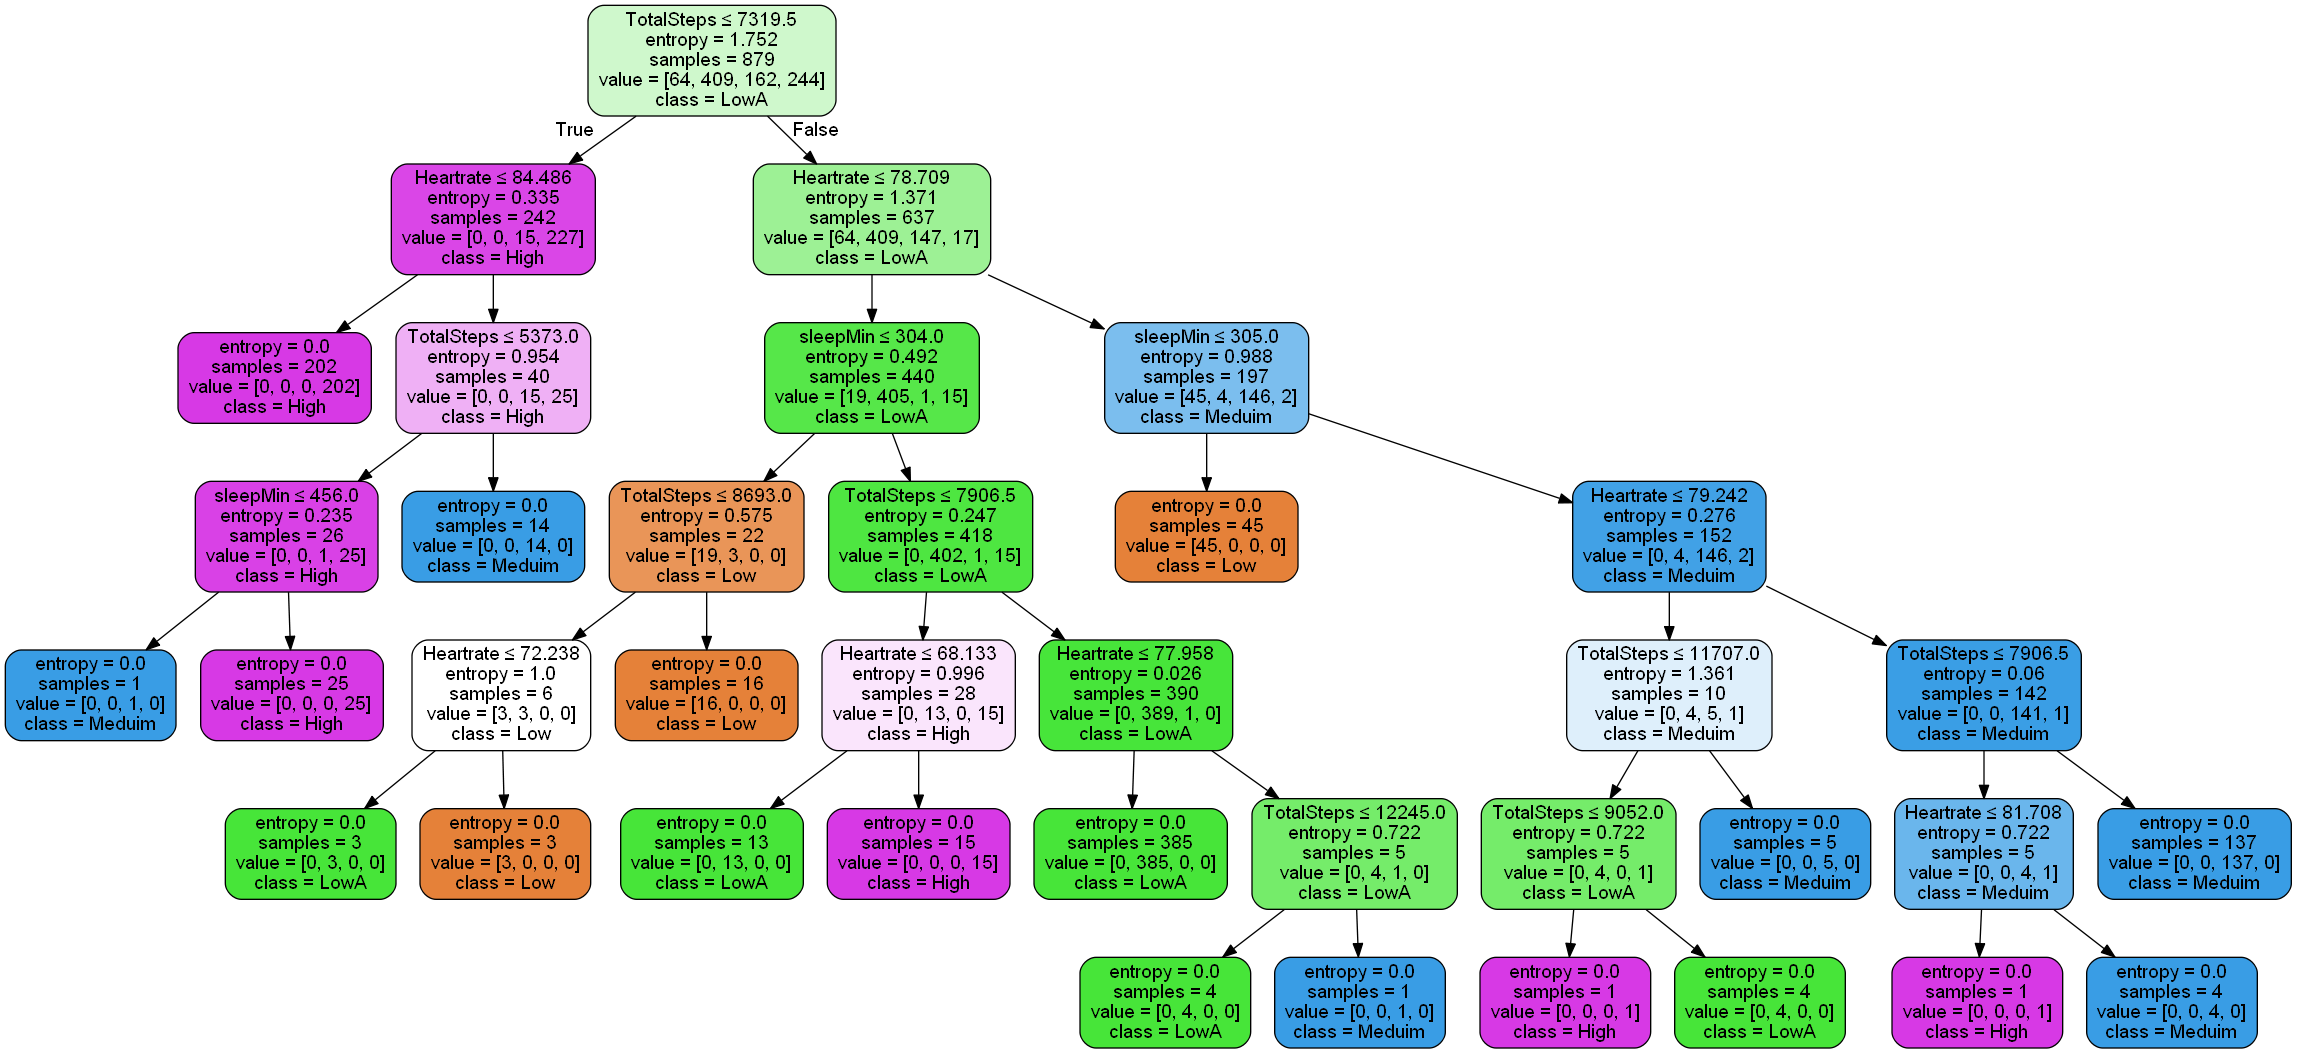

In [49]:
dot_data = StringIO()
export_graphviz(descTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=df_desc.columns[0:3],  
                class_names=df_desc.Label.unique().tolist())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

We can adjust the depth of decision tree(number of branches) by setting the _max_depth_ value in our model
- $X_{0}$ is first feature Heart Rate
- $X_{1}$ is second feature Total Steps
- $X_{2}$ is thrid feature sleepMin

## Classification for new data set

In [50]:
# Step 1
df=pd.read_csv('clustered_data.csv',index_col=0)    # Load label data
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3)  #Splitting of Data into train and test set
descTree = DecisionTreeClassifier(criterion="entropy",max_depth=None) # Define Model
descTree.fit(X_trainset,y_trainset) # train the model using training set
predTree = descTree.predict(X_testset)  # test the model using testing set
#10 fold croos validation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9920424403183024


#### Do a 3 fold cross validiation 

In [51]:
results_dt = cross_val_score(descTree, X,y, cv=3)
print("\n3-fold cross-validation:")
print(results_dt)

print("The average accuracy of the Decision tree classifier is : %.2f" % np.mean(results_dt))

print("\nConfusion matrix of the Decision tree classifier:")
predicted_dt = descTree.predict(X_testset)
print(confusion_matrix(y_testset,predicted_dt))


print("\nClassification_report of Decision tree classifier:")
print(classification_report(y_testset,predicted_dt))
print("----------------------------------------------------------------------------")



3-fold cross-validation:
[0.88544153 0.94033413 0.97129187]
The average accuracy of the Decision tree classifier is : 0.93

Confusion matrix of the Decision tree classifier:
[[ 34   0   0   0]
 [  0 179   0   0]
 [  0   0  64   3]
 [  0   0   0  97]]

Classification_report of Decision tree classifier:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        34
         Low       1.00      1.00      1.00       179
        LowA       1.00      0.96      0.98        67
      Meduim       0.97      1.00      0.98        97

    accuracy                           0.99       377
   macro avg       0.99      0.99      0.99       377
weighted avg       0.99      0.99      0.99       377

----------------------------------------------------------------------------


Now our model is trained using 3 parameters _Heartrate_ ,  _TotalSteps_ and  _sleepMin_. Make sure to load the data with same parameters

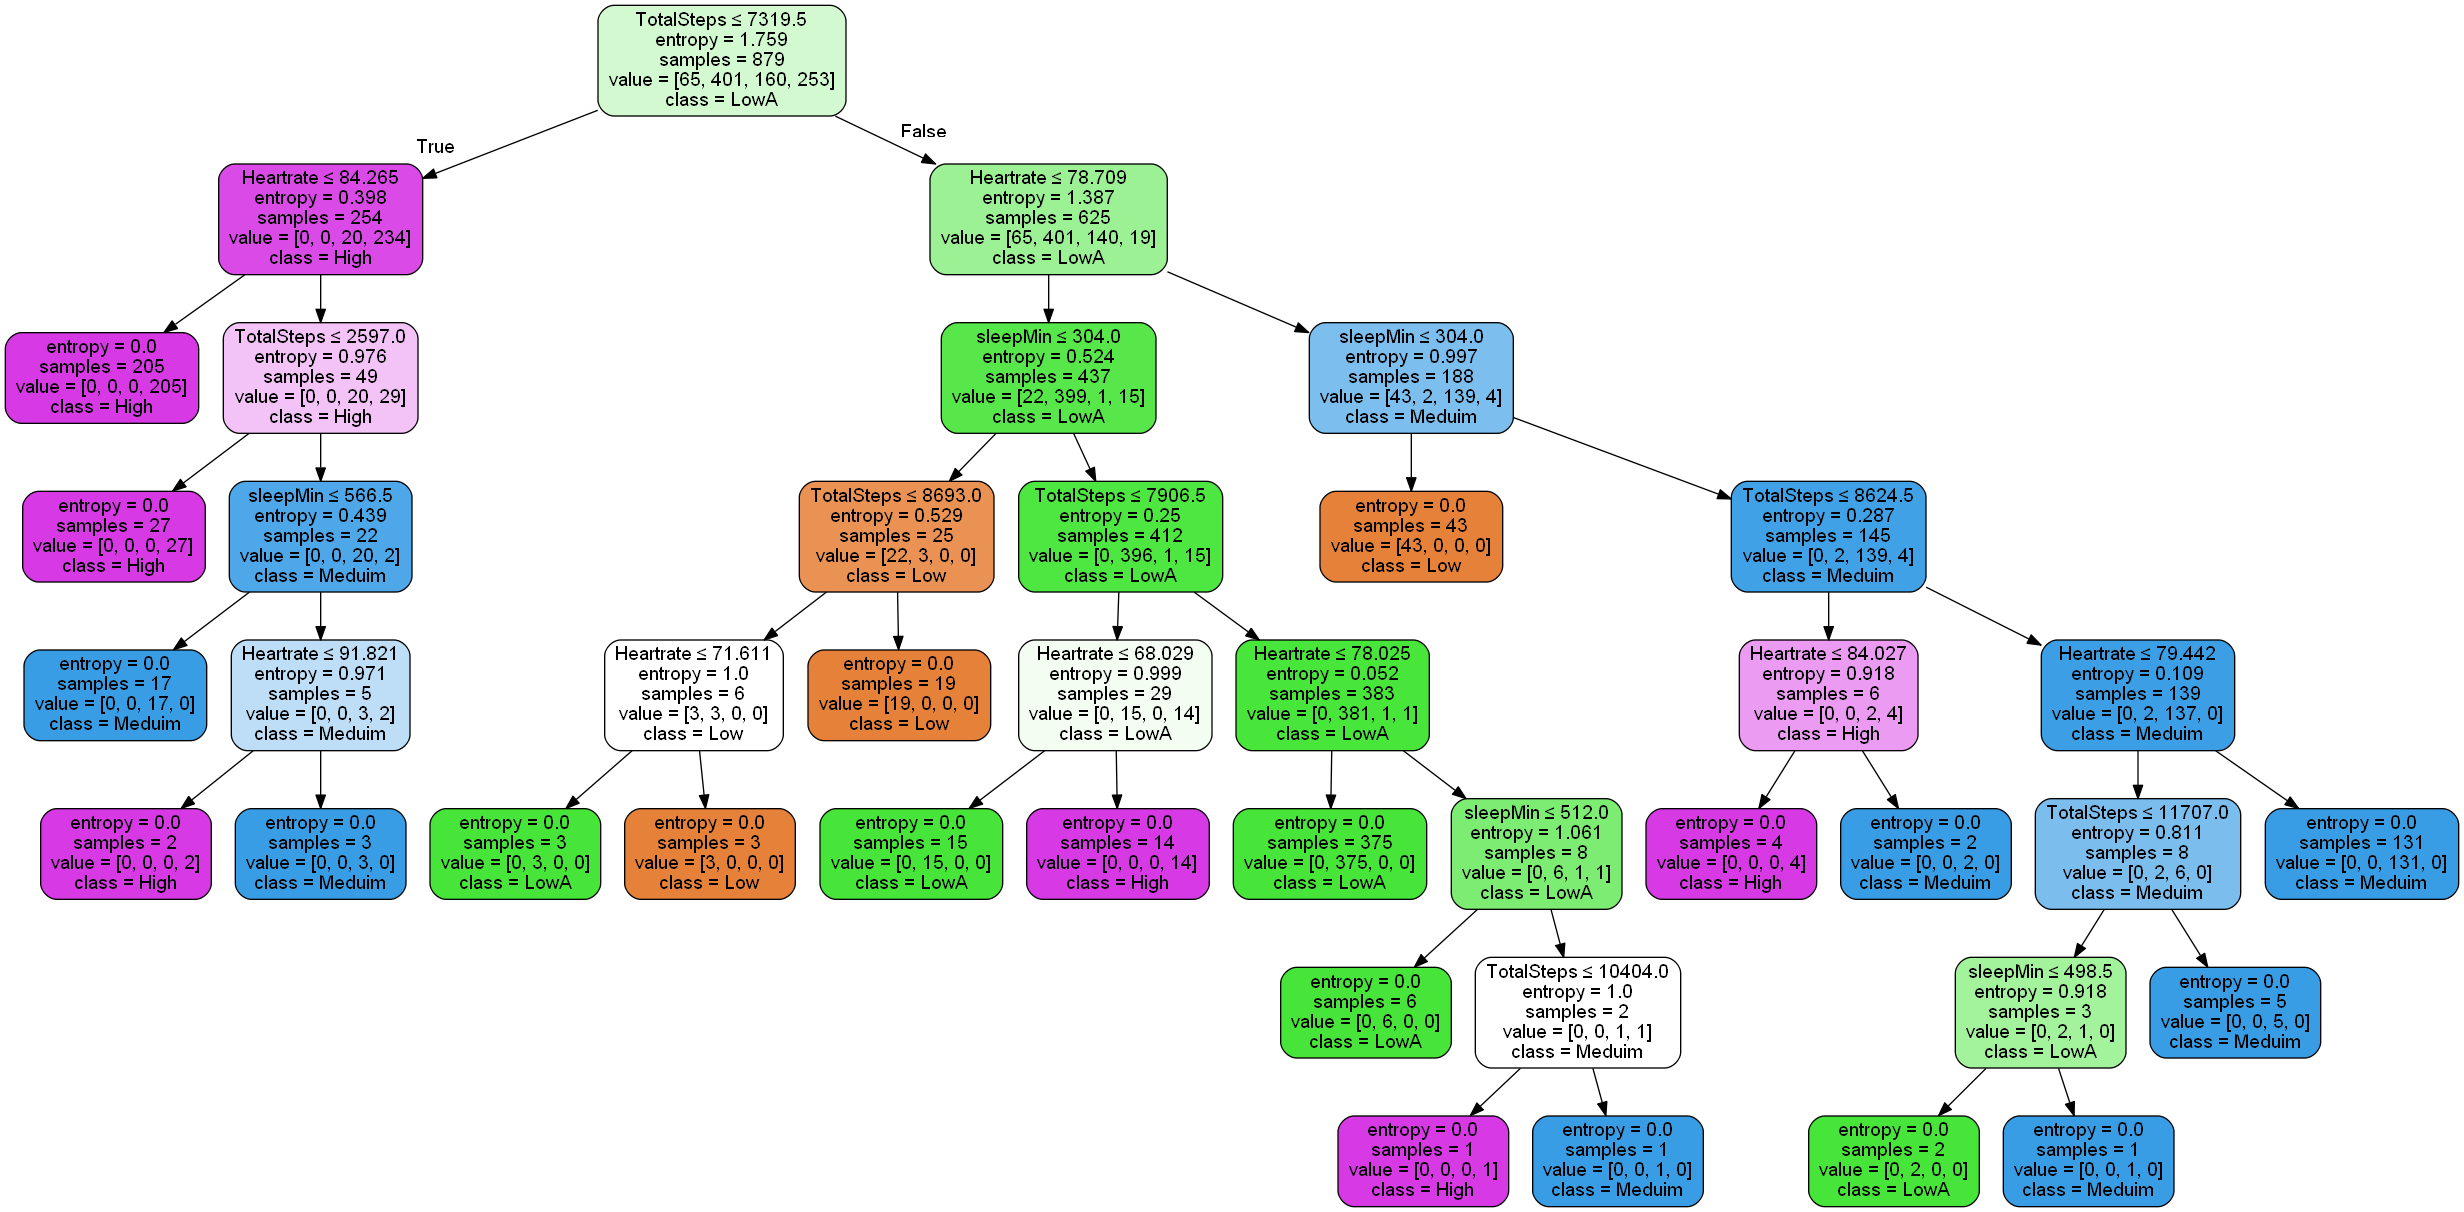

In [52]:
# Visualization
dot_data = StringIO()
export_graphviz(descTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=df.columns[0:3],  
                class_names=df.Label.unique().tolist())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [53]:
# Labeling of new data set
new_df=pd.read_csv('TestData.csv',index_col=0) # load the csv file
X = new_df[['Heartrate', 'TotalSteps' , 'sleepMin']].values
new_df["Label"] = descTree.predict(X)
new_df.head(10)

,Heartrate,TotalSteps,sleepMin,Label
0,94.528571,1988,464,Meduim
1,106.171986,10976,68,High
2,77.810298,10976,68,High
3,73.161290,15459,458,Low
4,113.171875,9917,352,LowA
5,94.601415,7238,516,LowA
6,58.540193,8921,448,Low
7,97.138568,9910,63,High
8,73.893939,11107,462,Low
9,104.758355,11761,455,LowA
